In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('weather.csv', sep = ';')

In [ ]:
dataset

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,No,No
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,No,Yes
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,Yes,Yes
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,Yes,Yes
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14463,12,Uluru,22.1,35.8,63.8,43,17,31,77,41,997.8,995.2,2,26.0,33.5,Yes,No
14464,12,Uluru,22.6,36.8,0.0,50,30,15,63,39,1000.0,998.8,-1,29.7,34.0,No,No
14465,12,Uluru,23.2,38.0,0.0,33,17,17,25,14,1004.4,1001.0,-1,28.7,36.4,No,No
14466,12,Uluru,19.7,37.0,0.0,37,22,6,30,23,1004.6,1000.9,-1,28.2,35.1,No,No


In [ ]:
len(dataset)

14468

In [ ]:
dataset.isnull().sum()

,0
Month,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [ ]:
dataset['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,11038
Yes,3430


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Albury'),
  Text(1, 0, 'MelbourneAirport'),
  Text(2, 0, 'Adelaide'),
  Text(3, 0, 'Perth'),
  Text(4, 0, 'Mildura'),
  Text(5, 0, 'Darwin'),
  Text(6, 0, 'Dartmoor'),
  Text(7, 0, 'Nhil'),
  Text(8, 0, 'NorahHead'),
  Text(9, 0, 'Wollongong'),
  Text(10, 0, 'PerthAirport'),
  Text(11, 0, 'SydneyAirport'),
  Text(12, 0, 'Bendigo'),
  Text(13, 0, 'Hobart'),
  Text(14, 0, 'Richmond'),
  Text(15, 0, 'Portland'),
  Text(16, 0, 'Ballarat'),
  Text(17, 0, 'Nuriootpa'),
  Text(18, 0, 'AliceSprings'),
  Text(19, 0, 'Canberra'),
  Text(20, 0, 'Brisbane'),
  Text(21, 0, 'PearceRAAF'),
  Text(22, 0, 'Woomera'),
  Text(23, 0, 'Tuggeranong'),
  Text(24, 0, 'Townsville'),
  Text(25, 0, 'Sydney'),
  Text(26, 0, 'WaggaWagga'),
  Text(27, 0, 'Watsonia'),
  Text(28, 0, 'MountGambier'),
  Text(29, 0,

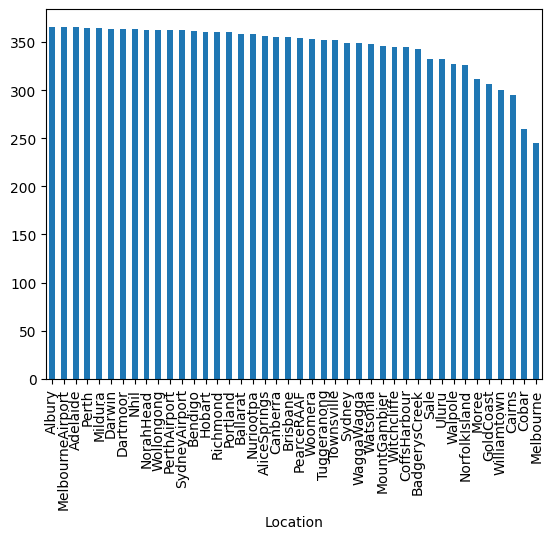

In [ ]:
import matplotlib.pyplot as plt
p = dataset['Location'].value_counts().plot(kind='bar')
plt.xticks(rotation = 'vertical')

<Axes: xlabel='Location'>

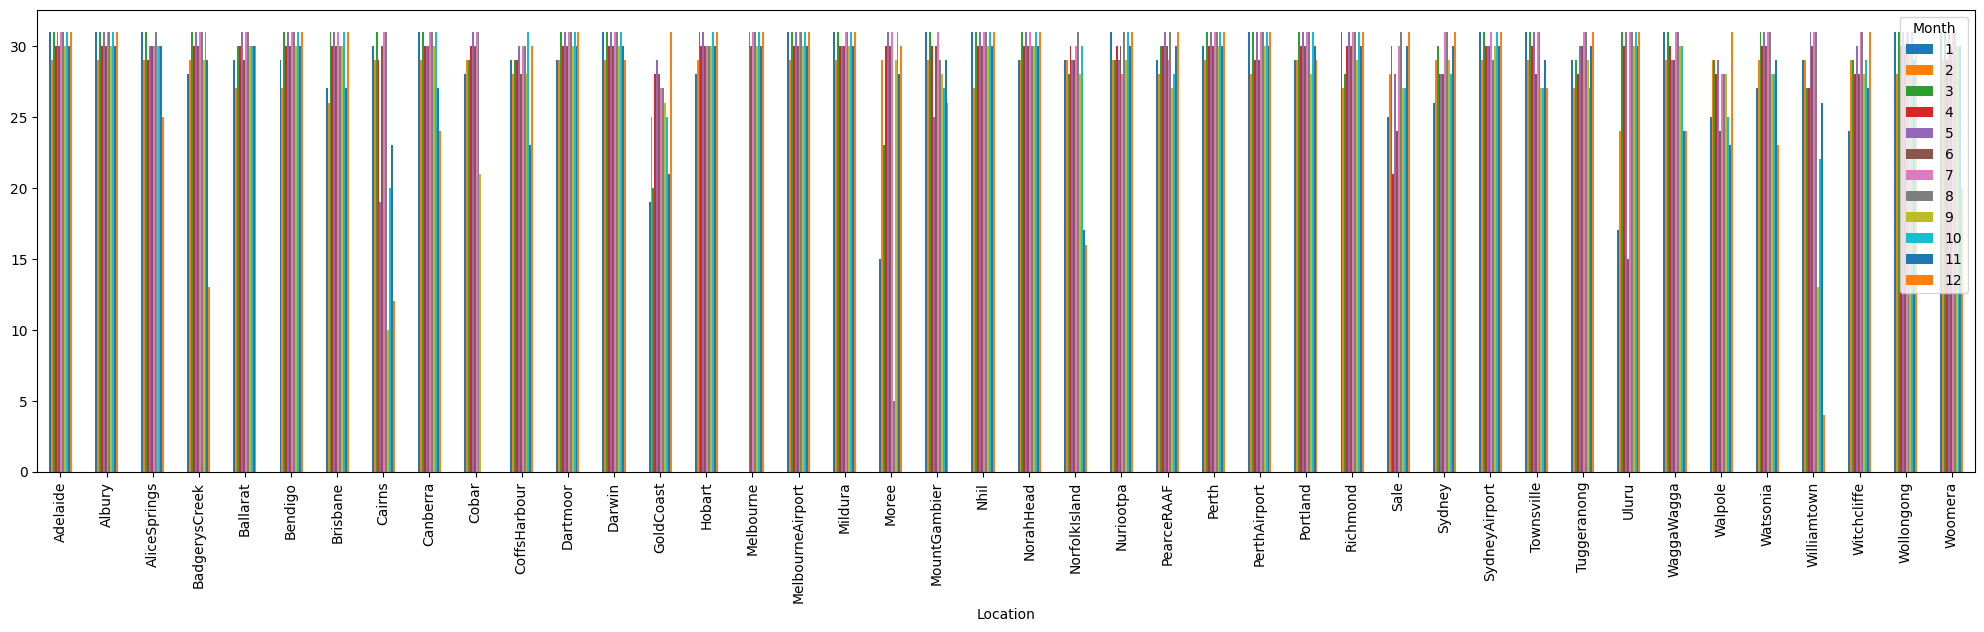

In [ ]:
dataset['count'] = 1
pivot = pd.pivot_table(data = dataset,
                       index = 'Location',
                       columns = 'Month',
                       values = 'count',
                       aggfunc = 'sum')
pivot = pivot.fillna(0)
pivot.plot(kind = 'bar', figsize = (25,6))

In [ ]:
dataset['min_humidity'] = np.minimum(dataset['Humidity3pm'], dataset['Humidity9am'])
pd.pivot_table(data = dataset,
               index = 'Location',
               columns = 'Month',
               values = 'min_humidity',
               aggfunc = 'min')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Location,,,,,,,,,,,,
Adelaide,11.0,13.0,19.0,15.0,32.0,40.0,36.0,28.0,30.0,16.0,12.0,10.0
Albury,13.0,15.0,10.0,21.0,32.0,50.0,52.0,43.0,45.0,40.0,14.0,11.0
AliceSprings,13.0,5.0,5.0,7.0,5.0,10.0,10.0,11.0,8.0,5.0,3.0,4.0
BadgerysCreek,21.0,24.0,30.0,25.0,23.0,32.0,32.0,35.0,31.0,23.0,18.0,23.0
Ballarat,9.0,13.0,15.0,20.0,36.0,51.0,66.0,47.0,61.0,36.0,34.0,16.0
Bendigo,10.0,10.0,13.0,18.0,41.0,49.0,43.0,46.0,48.0,23.0,16.0,12.0
Brisbane,43.0,32.0,44.0,38.0,22.0,32.0,27.0,27.0,20.0,20.0,19.0,43.0
Cairns,40.0,47.0,48.0,51.0,56.0,47.0,48.0,37.0,57.0,44.0,24.0,42.0
Canberra,11.0,15.0,12.0,20.0,30.0,45.0,40.0,34.0,40.0,30.0,20.0,17.0


In [ ]:
dataset['max_humidity'] = np.maximum(dataset['Humidity3pm'], dataset['Humidity9am'])
pd.pivot_table(data = dataset,
               index = 'Location',
               columns = 'Month',
               values = 'max_humidity',
               aggfunc = 'max')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Location,,,,,,,,,,,,
Adelaide,93.0,76.0,93.0,84.0,93.0,96.0,97.0,96.0,96.0,95.0,71.0,89.0
Albury,96.0,88.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,98.0,98.0,93.0
AliceSprings,98.0,61.0,98.0,49.0,94.0,97.0,83.0,97.0,83.0,100.0,59.0,99.0
BadgerysCreek,100.0,95.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,89.0,87.0
Ballarat,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.0
Bendigo,94.0,79.0,89.0,92.0,97.0,98.0,99.0,99.0,99.0,98.0,92.0,88.0
Brisbane,86.0,75.0,90.0,85.0,92.0,94.0,97.0,89.0,87.0,87.0,88.0,82.0
Cairns,87.0,95.0,95.0,98.0,86.0,97.0,98.0,97.0,93.0,94.0,76.0,82.0
Canberra,94.0,96.0,99.0,93.0,99.0,99.0,99.0,99.0,99.0,94.0,86.0,94.0


<Axes: xlabel='Month'>

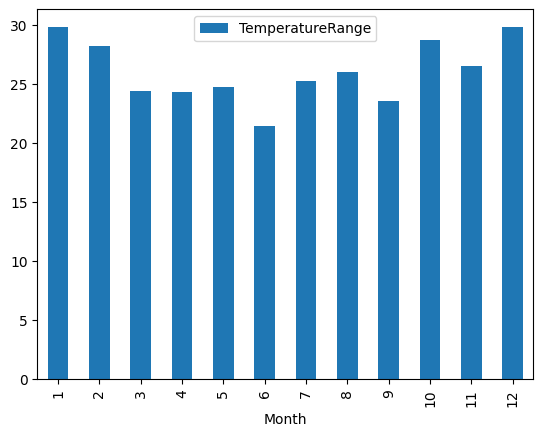

In [ ]:
dataset['TemperatureRange'] = dataset['MaxTemp']-dataset['MinTemp']
p = pd.pivot_table(data = dataset,
               index = 'Month',
               values = 'TemperatureRange',
               aggfunc = 'max')
p.plot(kind = 'bar')

In [ ]:
map = {'No':0,
       'Yes':1}
dataset['RainToday'] = dataset['RainToday'].map(map)
dataset['RainTomorrow'] = dataset['RainTomorrow'].map(map)
reduce = dataset[dataset['Cloud3pm'] >= 0]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = ['RainTomorrow', 'Location']),
                                                    dataset['RainTomorrow'],
                                                    test_size = 0.2,
                                                    stratify = dataset['RainTomorrow'])
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
log = LogisticRegression()
log.fit(X_train, y_train)
pred_log = log.predict(X_test)
print('Accuracy dtc: ', accuracy_score(y_test, pred_dtc))
print('Accuracy log: ', accuracy_score(y_test, pred_log))


Accuracy dtc:  0.7805805114029025
Accuracy log:  0.8372494816862474


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


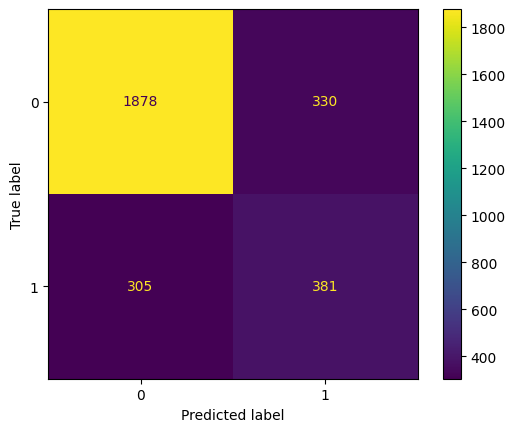

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, pred_dtc)

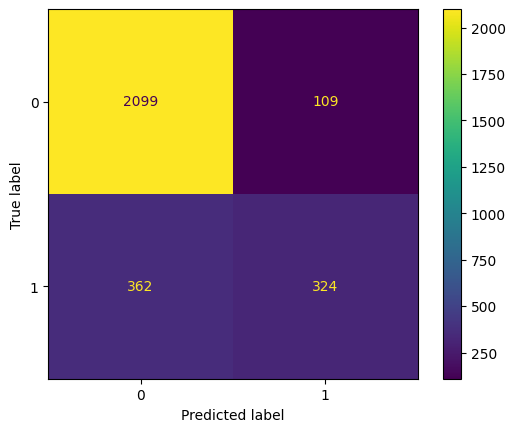

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_log)

In [ ]:
from sklearn.model_selection import cross_val_score
print('Accuracy dtc: ', cross_val_score(DecisionTreeClassifier(),
                                        dataset.drop(columns = ['RainTomorrow', 'Location']),
                                        dataset['RainTomorrow'],
                                        cv = 5).mean())
print('Accuracy log: ', cross_val_score(LogisticRegression(solver='saga'),
                                        dataset.drop(columns = ['RainTomorrow', 'Location']),
                                        dataset['RainTomorrow'],
                                        cv = 5).mean())

Accuracy dtc:  0.7610604774625785


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy log:  0.8358448090152073


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
dataset['MeanTemp'] = (dataset['MaxTemp']+dataset['MinTemp'])/2
dataset['MeanWind'] = (dataset['WindSpeed9am']+dataset['WindSpeed3pm'])/2
dataset.drop(columns = ['MaxTemp', 'MinTemp', 'WindSpeed9am', 'WindSpeed3pm'],
             inplace = True)

In [ ]:
print('Accuracy dtc: ', cross_val_score(DecisionTreeClassifier(),
                                        dataset.drop(columns = ['RainTomorrow', 'Location']),
                                        dataset['RainTomorrow'],
                                        cv = 5).mean())
print('Accuracy log: ', cross_val_score(LogisticRegression(solver='saga'),
                                        dataset.drop(columns = ['RainTomorrow', 'Location']),
                                        dataset['RainTomorrow'],
                                        cv = 5).mean())

Accuracy dtc:  0.7560140758702881


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy log:  0.8362594361291021


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.svm import SVR
dataset = pd.read_csv('weather.csv', sep = ';')
map = {'No':0,
       'Yes':1}
dataset['RainToday'] = dataset['RainToday'].map(map)
dataset['RainTomorrow'] = dataset['RainTomorrow'].map(map)
cloudP = dataset[dataset['Cloud3pm'] < 0]
cloudT = dataset[dataset['Cloud3pm'] >= 0]
svr = SVR(C = 1, epsilon = 0.1)
svr.fit(cloudT.drop(columns = ['Location', 'Cloud3pm']), cloudT['Cloud3pm'])
cloudP['Cloud3pm'] = svr.predict(cloudP.drop(columns = ['Location', 'Cloud3pm']))

<ipython-input-87-ee83b11a2d29>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloudP['Cloud3pm'] = svr.predict(cloudP.drop(columns = ['Location', 'Cloud3pm']))


In [ ]:
cloudP

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
9,1,Albury,17.8,37.0,0.0,41,9,17,54,17,1016.6,1012.6,3.427151,26.2,36.2,0,0
11,1,Albury,20.6,38.9,0.0,56,6,24,40,18,1010.8,1009.8,3.330930,28.1,37.6,0,0
12,1,Albury,20.2,43.0,0.0,72,15,24,51,16,1013.8,1007.5,3.479286,27.9,42.3,0,0
14,1,Albury,10.4,25.2,0.0,46,19,20,41,31,1026.1,1023.8,4.090036,15.9,23.9,0,0
15,1,Albury,10.7,29.4,0.0,35,13,9,45,19,1027.4,1022.9,3.478823,17.8,27.3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14457,12,Uluru,26.1,38.2,0.0,50,26,26,32,19,1010.3,1006.4,3.253372,29.1,37.1,0,0
14464,12,Uluru,22.6,36.8,0.0,50,30,15,63,39,1000.0,998.8,4.716370,29.7,34.0,0,0
14465,12,Uluru,23.2,38.0,0.0,33,17,17,25,14,1004.4,1001.0,2.847720,28.7,36.4,0,0
14466,12,Uluru,19.7,37.0,0.0,37,22,6,30,23,1004.6,1000.9,3.374704,28.2,35.1,0,0


In [ ]:
df = pd.concat([cloudP, cloudT])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['RainTomorrow', 'Location']),
                                                    df['RainTomorrow'],
                                                    test_size = 0.2,
                                                    stratify = df['RainTomorrow'])
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)
log = LogisticRegression()
log.fit(X_train, y_train)
pred_log = log.predict(X_test)
print('Accuracy dtc: ', accuracy_score(y_test, pred_dtc))
print('Accuracy log: ', accuracy_score(y_test, pred_log))

Accuracy dtc:  0.7753973738769868
Accuracy log:  0.8386316516931582


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dataset = pd.read_csv('weather.csv', sep = ';')
map = {'No':0,
       'Yes':1}
dataset['RainToday'] = dataset['RainToday'].map(map)
dataset['RainTomorrow'] = dataset['RainTomorrow'].map(map)
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = ['RainTomorrow', 'Location']),
                                                    dataset['RainTomorrow'],
                                                    test_size = 0.2,
                                                    stratify = dataset['RainTomorrow'])
svr = SVR(C=1, epsilon = 0.1)
svr.fit(X_train, y_train)
pred = np.round(svr.predict(X_test), decimals = 0)
pred

array([ 0.,  0., -0., ...,  0.,  0., -0.])

In [ ]:
accuracy_score(y_test, pred)

0.771596406357982